# Descriptive Analysis Notebook

#### This notebook contains a demonstration of the tools necessary for conducting descriptive analysis of the data. This includes things such as frequency analysis, descripting statistics and temporal frequency.

In [1]:
import trt_API.process as proc
import trt_API.analysis as ana
import pandas as pd
import matplotlib.pyplot as plt
SORTED = False

## Variables for Analysis

In [3]:
# Set the path to the parent directory containing all Tweets of interest
DIRECTORY = './tweets/*'
# Set to True to isolate english language tweets
ENGLISH = False

## Load Tweet and Generate Dataframe

In [4]:
tweet_objects = proc.loadTweetObjects(DIRECTORY)
encoding = True #Use False on Macs for better results
df = proc.convertTweetsToDataframe(tweet_objects, ENGLISH, encoding)

Loaded utf-8 df.
Initial size: 5065
Dropping duplicates...
Final size: 2540


## Extract Potential Cashtags

In [24]:
ctdf = proc.extractPossibleCashtags(df)

Total potential Cashtags: 53
Empty DataFrame
Columns: []
Index: []


## Removing Noisy Tweets

In [21]:
'''
*** Tweets often use popular hashtags with unrelated topics.
*** Noisy words can be identified to use to filter such tweets.
*** Enter these words below in the noisy_terms list.
'''
noisy_terms = []
cldf = proc.removeNoisyTerms(df, noisy_terms)
cldf

Removed 0 noisy terms.


,date,followers,username,location,tweet,id,original_tweet
0,Jul 05 02:20:06 2019\t0,1423,taz_haught,"Ohio, USA",RT @Delta: Let free entertainment ring. Vote f...,1146966956324642816,Let free entertainment ring. Vote for your fav...
2,Jul 05 03:48:33 2019\t0,529,SODaimond,"Lohr am Main, Deutschland",RT @flyethiopian: Ethiopian Airlines will add ...,1146989215487614976,Ethiopian Airlines will add new flight routes ...
4,Jul 05 04:23:56 2019\t0,63,sergiohernandez,None,@TomFitton @realDonaldTrump Loved the part whe...,1146998119990583296,None
6,Jul 05 04:43:57 2019\t0,277,McCharles_Ltd,"Nairobi, Kenya",@KenyaAirways @dailynation That is not exactly...,1147003157375049728,None
8,Jul 05 08:33:43 2019\t0,141046,TamekaRaymond,Recaliberating...,@AirFranceFR I have been waiting for 2 hours ...,1147060980033175553,None
...,...,...,...,...,...,...,...
5055,Jul 10 22:48:16 2019\t0,11,crob8808,None,Thanks @AmericanAir for denying my husband his...,1149087973939564545,Excuse me @Delta but this is outrageous. I jus...
5057,Jul 10 22:50:22 2019\t0,82,MrLiamS33,"Lake Mills, WI",@AmericanAir shame on you for embarrassing the...,1149088502384119811,None
5059,Jul 10 23:24:35 2019\t0,15,jessicaagould,None,RT @drewisgooden: Excuse me @Delta but this is...,1149097113294446593,Excuse me @Delta but this is outrageous. I jus...
5061,Jul 10 23:44:06 2019\t0,24,HMan0860,None,@usmousie @tisharowemd @AmericanAir She was. A...,1149102024836837376,Excuse me @Delta but this is outrageous. I jus...


## Remove Retweets

In [22]:
cldf_no_RT, cldf = proc.removeRetweets(cldf)
cldf

Removed 555 duplicates.


/Users/rajuy/Desktop/twitter_research_tools/notebooks/trt_API/process.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RT'][df.tweet.astype(str).str[0:2] == 'RT'] = df.tweet.str.split(':',expand=True).iloc[:,0]


,date,followers,username,location,tweet,id,original_tweet,RT
0,Jul 05 02:20:06 2019\t0,1423,taz_haught,"Ohio, USA",RT @Delta: Let free entertainment ring. Vote f...,1146966956324642816,Let free entertainment ring. Vote for your fav...,RT @Delta
2,Jul 05 03:48:33 2019\t0,529,SODaimond,"Lohr am Main, Deutschland",RT @flyethiopian: Ethiopian Airlines will add ...,1146989215487614976,Ethiopian Airlines will add new flight routes ...,RT @flyethiopian
4,Jul 05 04:23:56 2019\t0,63,sergiohernandez,None,@TomFitton @realDonaldTrump Loved the part whe...,1146998119990583296,None,None
6,Jul 05 04:43:57 2019\t0,277,McCharles_Ltd,"Nairobi, Kenya",@KenyaAirways @dailynation That is not exactly...,1147003157375049728,None,None
8,Jul 05 08:33:43 2019\t0,141046,TamekaRaymond,Recaliberating...,@AirFranceFR I have been waiting for 2 hours ...,1147060980033175553,None,None
...,...,...,...,...,...,...,...,...
5055,Jul 10 22:48:16 2019\t0,11,crob8808,None,Thanks @AmericanAir for denying my husband his...,1149087973939564545,Excuse me @Delta but this is outrageous. I jus...,None
5057,Jul 10 22:50:22 2019\t0,82,MrLiamS33,"Lake Mills, WI",@AmericanAir shame on you for embarrassing the...,1149088502384119811,None,None
5059,Jul 10 23:24:35 2019\t0,15,jessicaagould,None,RT @drewisgooden: Excuse me @Delta but this is...,1149097113294446593,Excuse me @Delta but this is outrageous. I jus...,RT @drewisgooden
5061,Jul 10 23:44:06 2019\t0,24,HMan0860,None,@usmousie @tisharowemd @AmericanAir She was. A...,1149102024836837376,Excuse me @Delta but this is outrageous. I jus...,None


In [8]:
print(cldf_no_RT.shape[0])

1985


## Convert Tweets to List

In [9]:
cldf['original_tweet'][cldf.original_tweet == 'None'] = cldf['tweet']
cldf['tweet'] = cldf['original_tweet']
del cldf['original_tweet']
print(cldf.head())
tweets = list(cldf.tweet)

                      date  followers         username  \
0  Jul 05 02:20:06 2019\t0       1423       taz_haught   
2  Jul 05 03:48:33 2019\t0        529        SODaimond   
4  Jul 05 04:23:56 2019\t0         63  sergiohernandez   
6  Jul 05 04:43:57 2019\t0        277    McCharles_Ltd   
8  Jul 05 08:33:43 2019\t0     141046    TamekaRaymond   

                    location  \
0                  Ohio, USA   
2  Lohr am Main, Deutschland   
4                       None   
6             Nairobi, Kenya   
8          Recaliberating...   

                                               tweet                   id  \
0  Let free entertainment ring. Vote for your fav...  1146966956324642816   
2  Ethiopian Airlines will add new flight routes ...  1146989215487614976   
4  @TomFitton @realDonaldTrump Loved the part whe...  1146998119990583296   
6  @KenyaAirways @dailynation That is not exactly...  1147003157375049728   
8  @AirFranceFR  I have been waiting for 2 hours ...  1147060980033175553

<ipython-input-9-a3c3d762bb2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cldf['original_tweet'][cldf.original_tweet == 'None'] = cldf['tweet']


## Hashtag Frequencies

In [29]:
hashtags = [""]

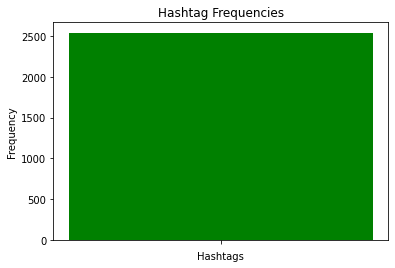

[2540]

In [30]:
ana.countItems(hashtags,tweets,PLOT=True,PRINT=False)

In [12]:
usernames = []

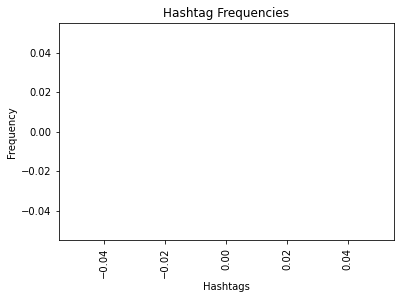

[]

In [13]:
ana.countItems(usernames,tweets,PLOT=True,PRINT=False)

## Sort By Date

In [14]:
sorted_cldf, SORTED = ana.sortByDate(cldf,SORTED,PRINT_TOP=False,TOP=10)

In [15]:
cldf.head()

,date,followers,username,location,tweet,id,RT
4835,2019-07-02 01:22:54,445,thewonderofivy,"Reading, PA",Here is what i was wearing when @AmericanAir a...,1145865397868072960,RT @tisharowemd
1221,2019-07-02 01:24:13,227,WarrenLewisCPA,"3609 O Street, NW",@tisharowemd @mstwill @AmericanAir That’s craz...,1145865729218101250,None
4836,2019-07-02 01:32:33,9,hdcloutpay,"Detroit Beach, MI",Here is what i was wearing when @AmericanAir a...,1145867826370158595,None
4837,2019-07-02 01:36:54,45,BenKeefe,Minnesota,Plus - had to pay for my own overnight accommo...,1145868921091833861,RT @AliceKeefeABC6
4838,2019-07-02 01:49:01,2313,tisharowemd,"Houston, TX",@tisharowemd @AmericanAir We are flying @Ameri...,1145871970371821568,RT @CuriouZMedic


## Plot by Month

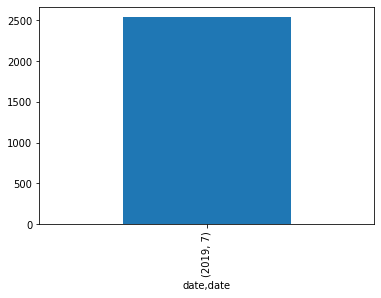

In [16]:
cldf.tweet.groupby([cldf['date'].dt.year,cldf["date"].dt.month]).count().plot(kind="bar")

## Sort by Number of Followers

In [17]:
TOP_N = 20 ## USE THIS VARIABLE TO SET THE NUMBER OF USERS TO ANALYZE
cldf.followers = df.followers.astype(int)
cldf.sort_values(by='followers',ascending=False,inplace=True)
cldf.head(TOP_N)

,date,followers,username,location,tweet,id,RT
1582,2019-07-12 19:08:10,2371051,SaharaReporters,New York,Excuse me @Delta but this is outrageous. I jus...,1149757359687917569,None
3191,2019-07-07 15:05:50,614369,kalpenn,New Jersey 4 Life,Delayed flight by 3 hours...And all I got was ...,1147884435175591936,None
1270,2019-07-02 17:04:47,532895,TedRubin,"Pompano Beach, FL",YES! RT @BrendaBerg: @united No empathy.The im...,1146102430574239744,None
547,2019-07-02 15:57:24,522297,flightradar24,"Stockholm, Sweden",Is Canada on your bucket list? We've flights f...,1146085473024172034,None
964,2019-07-07 11:47:55,494166,madflavor,Los Angeles CALIFORNIA,@AlonzoBodden @AmericanAir Congrats on The Cli...,1147834627807014912,None
2463,2019-07-07 08:26:25,453621,IH4T3N1GGERSS,Shop Now! →,I HATE FUCKING NIGGERS HOLY FUCKING SHIT @TARI...,1147783918650908672,None
2515,2019-07-04 15:30:19,344262,LondONtheinside,London Town,FREE FILMS are being screened @Everymancinema ...,1146803433015582720,None
2709,2019-07-09 11:11:06,314474,itsjasYO,"Nevada, USA",I do not want to continue the same cycle. Exac...,1148550138308124672,None
2050,2019-07-09 11:11:06,314474,DublinAirport,"Dublin, Ireland",@UpInTheAirCK @British_Airways @AmericanAir Hi...,1148550138320674816,None
695,2019-07-10 14:22:07,305361,KatiePiper_,London,.@HarperCollinsUK to supply flying library for...,1148960597083643904,RT @BookBrunch


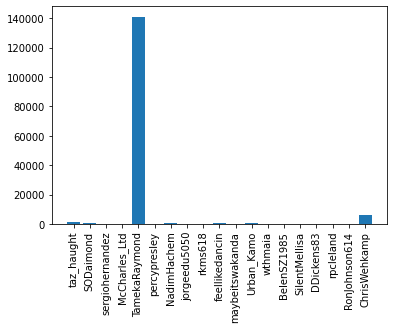

In [31]:
plt.bar(cldf.iloc[:TOP_N].username.astype(str),cldf.iloc[:TOP_N].followers.astype(int))
plt.xticks(rotation='vertical')
plt.show()

## Top Hashtags

[10, 10, 10, 11, 11, 11, 12, 12, 13, 13, 14, 15, 18, 21, 26, 31, 40, 82, 100, 100]


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128071 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128071 missing from current font.
  font.set_text(s, 0, flags=flags)


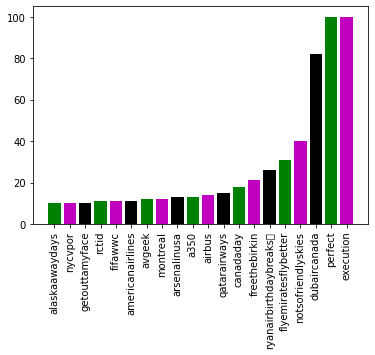

In [19]:
TOP_N = 20 ## USE THIS NUMBER TO SET THE NUMBER OF TOP HASHTAGS TO LOOK AT
ana.topHashtags(tweets,TOP_N)

## Top User Mentions

[22, 25, 25, 37, 40, 46, 47, 47, 52, 61, 64, 69, 71, 94, 118, 130, 139, 160, 435, 658]


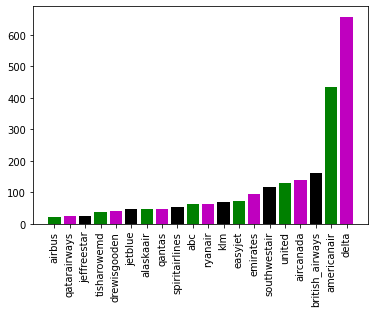

In [20]:
TOP_N = 20 ## USE THIS NUMBER TO SET THE NUMBER OF TOP USER MENTIONS TO LOOK AT
ana.topUserMentions(tweets,TOP_N)